## Dataset : [free spoken digits](https://www.kaggle.com/abdelrahmangamil/freespokendigits)

In [1]:
import os
#print(os.listdir('./recordings'))

In [2]:
data_path = './train/train_new'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import librosa
import os
from os.path import isdir, join
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.io import wavfile
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
def load_speeches(path):
    waves = [f for f in os.listdir(path) if f.endswith('.wav')]
    samples_rate = []
    all_waves = []
    for wav in waves:
        sample_rate, samples = wavfile.read(join(path,wav))
        samples_rate.append(sample_rate)
        all_waves.append(samples)
    data = pd.read_csv('train.csv')
    labels = [data.iloc[:, 1][i] for i in range(len(data))]
    return all_waves ,samples_rate,labels

In [7]:
def get_spectrograms(waves):
    sample_rate = 8000
    spectros = []
    freqs = []
    tims = []
    for wav in waves:
        frequencies, times, spectrogram = signal.spectrogram(wav, sample_rate)
        freqs.append(frequencies)
        tims.append(times)
        spectros.append(spectrogram)
    return freqs,tims,spectros
        

In [8]:
all_waves,samples_rate,labels = load_speeches(data_path) #len(labels) = 3000

In [9]:
max_sequence_len = max([len(x) for x in all_waves])
all_waves = np.array(pad_sequences(all_waves, maxlen=max_sequence_len, padding='post'))


In [10]:
freqs,tims,spectros = get_spectrograms(all_waves)

21
32
31
31
41
21
21
31
41
32


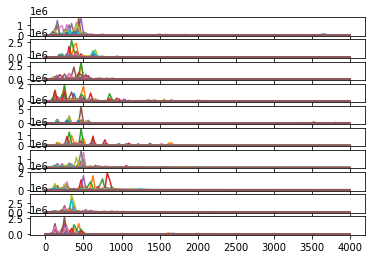

In [12]:
spectros[3].shape
fig, ax = plt.subplots(10)
for i in range(10):
    ax[i].plot(freqs[i], spectros[i])
for i in range(10):
    print(labels[i])

In [13]:
spectros = np.array(spectros)
spectros = spectros.reshape(90000, 129, 26, 1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

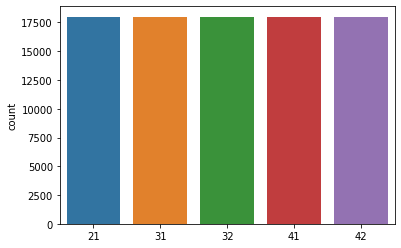

In [14]:
sns.countplot(labels)

In [16]:
import keras
import tensorflow as tf
labels = tf.keras.utils.to_categorical(labels, 43)

In [17]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(spectros, labels, test_size=0.2, random_state=42)

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import Input, layers
from tensorflow.keras import backend as K
import tensorflow as tf

In [19]:
X.shape[1:]

(129, 26, 1)

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (5,5), activation='relu',padding='same', input_shape=(129, 26, 1)),
  tf.keras.layers.Conv2D(32,(5,5), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
  tf.keras.layers.Dropout((0.25)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout((0.5)),
  tf.keras.layers.Dense(43, activation='softmax')
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer = tf.keras.optimizers.Adam( epsilon=1e-08), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X,Y,batch_size=512,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
141/141 [==============================] - 615s 4s/step - loss: 1379.3629 - accuracy: 0.1963 - val_loss: 1.7429 - val_accuracy: 0.1951
Epoch 2/100
  7/141 [>.............................] - ETA: 9:06 - loss: 2.4130 - accuracy: 0.1847

KeyboardInterrupt: 

0.95

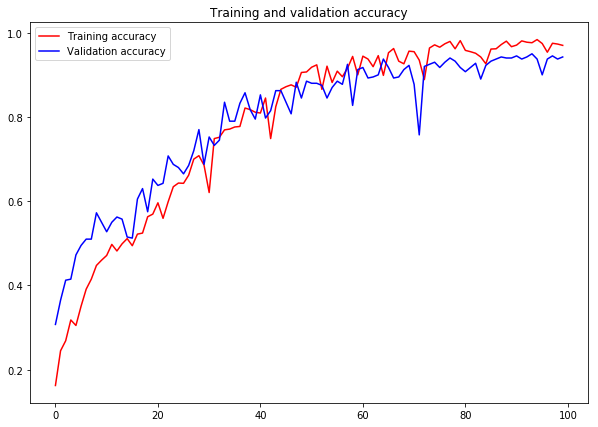

<Figure size 432x288 with 0 Axes>

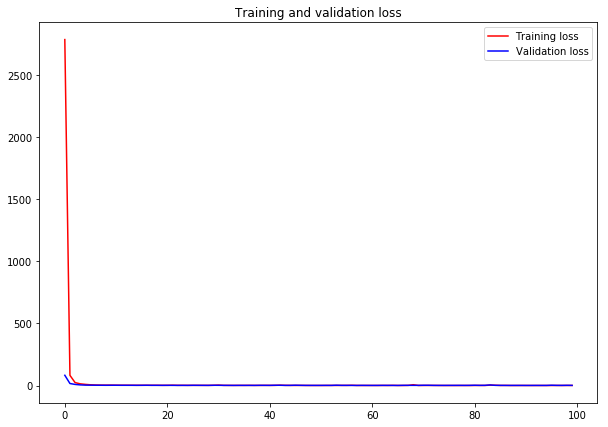

<Figure size 432x288 with 0 Axes>

In [19]:

%matplotlib inline
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
history = model.history
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.legend(['Training accuracy','Validation accuracy'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.legend(['Training loss','Validation loss'])
plt.figure()
max(val_acc) #the best validation accuracy the model have got